Data Shape: (70000, 784)
Target Shape: (70000,)
Hidden count: 256


f:\anaconda3\lib\site-packages\ipykernel\__main__.py:30: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Epoch 0
Iteration 5000


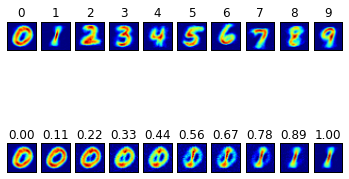

Iteration 10000


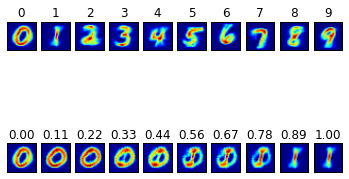

Iteration 15000


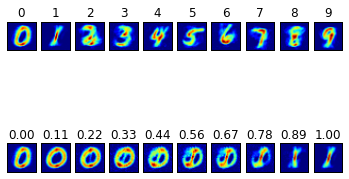

Iteration 20000


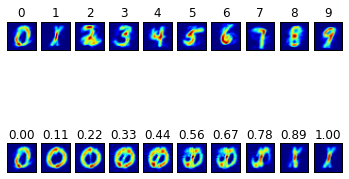

Iteration 25000


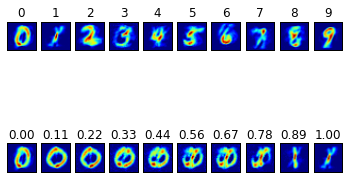

Iteration 30000


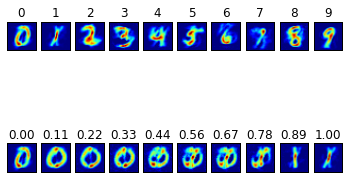

Iteration 35000


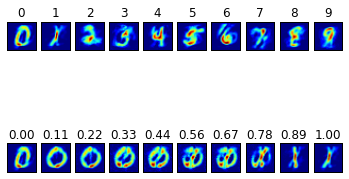

Iteration 40000


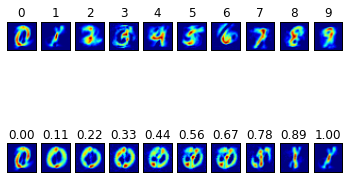

Iteration 45000


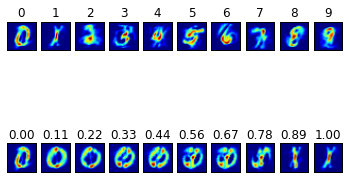

Iteration 50000


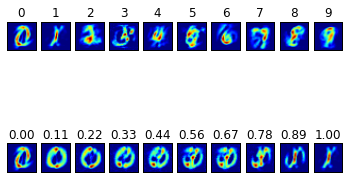

Iteration 55000


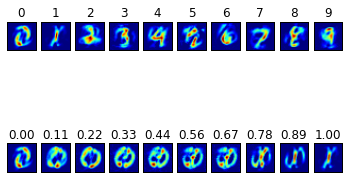

Iteration 60000


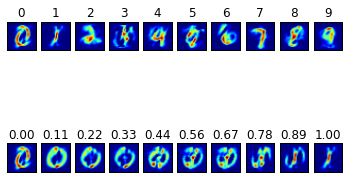

Iteration 65000


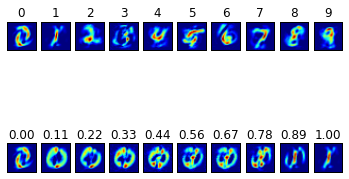

Iteration 70000


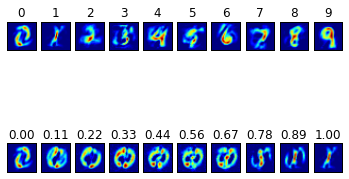

In [2]:
%matplotlib inline

# %load mnistlabeled.py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from util import get_mnist, ImageExperiment
from gsdr import GSDRStack

np.random.seed(123)

# Get the data
data, target = get_mnist()
print("Data Shape:", data.shape)
print("Target Shape:", target.shape)
input_size = (28, 28)
input_count = data.shape[1]

# Create the network
hidden_count = 256
print("Hidden count:", hidden_count)

forced_latent_count = 10

gsdr = GSDRStack()
gsdr.add(input_count=input_count, hidden_count=hidden_count, sparsity=0.1, forced_latent_count=forced_latent_count)

last_layer_index = len(gsdr._layers)-1
digit_forced_latents = np.eye(forced_latent_count)
forced_latents = [{last_layer_index: digit_forced_latents[target[i]]} for i in range(data.shape[0])]

def plot(exp):
    f, ax = plt.subplots(2, forced_latent_count)
    
    # Generate all digits from 0 to 9
    for j in range(forced_latent_count):
        generated = exp.gsdr.generate(forced_latents={last_layer_index: digit_forced_latents[j]})
        generated = (255 * np.clip(generated, 0, 1).reshape(input_size)).astype(np.uint8)
        img = Image.fromarray(generated)
        ax[0, j].imshow(img)
        ax[0, j].set_title(str(j))
        ax[0, j].axes.get_xaxis().set_visible(False)
        ax[0, j].axes.get_yaxis().set_visible(False)

    # Interpolate between 0 and 1
    for j in range(forced_latent_count):
        latent = j / (forced_latent_count-1) * digit_forced_latents[1] + (1 - j / (forced_latent_count-1)) * digit_forced_latents[0]
        generated = exp.gsdr.generate(forced_latents={last_layer_index: latent})
        generated = (255 * np.clip(generated, 0, 1).reshape(input_size)).astype(np.uint8)
        img = Image.fromarray(generated)
        ax[1, j].imshow(img)
        ax[1, j].set_title("%.2f" % (j / (forced_latent_count-1)))
        ax[1, j].axes.get_xaxis().set_visible(False)
        ax[1, j].axes.get_yaxis().set_visible(False)

    plt.show()

exp = ImageExperiment(gsdr, data, input_size, target=target, plot_func=plot, forced_latents=forced_latents, plot_iters=5000, learn_rate=0.0015)
exp.run()
